In [1005]:
import os
for dirname, _, filenames in os.walk('../COVID Healthy diet dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../COVID Healthy diet dataset/Food_Supply_kcal_Data.csv
../COVID Healthy diet dataset/Supply_Food_Data_Descriptions.csv
../COVID Healthy diet dataset/Protein_Supply_Quantity_Data.csv
../COVID Healthy diet dataset/Food_Supply_Quantity_kg_Data.csv
../COVID Healthy diet dataset/Fat_Supply_Quantity_Data.csv


# Project Healthy Diet (fighting COVID-19)

How can eating habits help fight the current COVID-19 pandemic? A healthy diet is very important to prevent and recover from various infections. Keeping a healthy immune system is a **must** in our current situation, and what we eat (along with exercising and clearing our heads every now and then) is key.

While it is clear that good nutrition alone will not cure nor prevent the spread of COVID-19, it helps us fight back in the case of infection and prevents several other health issues. A lot of tips can be found in [this](https://www.who.int/campaigns/connecting-the-world-to-combat-coronavirus/healthyathome/healthyathome---healthy-diet) very usefull and clear page kept by WHO (World Health Organization).

In this project, we will use data *from food intake by countries* along with data associated with the *spread of COVID-19 and other health issues* the help get new insights into the importance of nutrition and eating habits to combat spreading diseases.

Data for this project is taken from [this](https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset) very interesting kaggle dataset. From the owner of the dataset:

> In this dataset, I have combined data of different types of food, world population obesity and undernourished rate, and global COVID-19 cases count from around the world in order to learn more about how a healthy eating style could help combat the Corona Virus. And from the dataset, we can gather information regarding diet patterns from countries with lower COVID infection rate, and adjust our own diet accordingly

There are 5 files in the dataset:
* Fat_Supply_Quantity_Data.csv: percentage of fat intake from different food groups for 170 different countries.
* Food_Supply_Quantity_kg_Data.csv: percentage of food intake( in $kg$ ) from different food groups for 170 different countries.
* Food_Supply_kcal_Data.csv: percentage of energy intake (in $kcal$) from different food groups for 170 different countries.
* Protein_Supply_Quantity_Data.csv: percentage of protein intake from different food groups for 170 different countries.
    * All of these files have, also, columns including obesity, undernourishment and COVID-19 cases as percentages of total population.
* Supply_Food_Data_Descriptions.csv: This dataset is obtained from FAO.org, and is used to show the specific types of food that belongs to each category for the above datasets.


Now we can dig into the files.

In [1006]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Let's start by looking into the descriptions

In [1007]:
pd.set_option('display.max_colwidth', None)
desc_df = pd.read_csv('../COVID Healthy diet dataset/Supply_Food_Data_Descriptions.csv', index_col = 'Categories')
desc_df

,Items
Categories,
Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic; Beverages, Fermented; Wine"
Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil"
Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovine Meat; Butter, Ghee; Cephalopods; Cream; Crustaceans; Demersal Fish; Eggs; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil; Freshwater Fish; Marine Fish, Other; Meat, Aquatic Mammals; Meat, Other; Milk - Excluding Butter; Molluscs, Other; Mutton & Goat Meat; Offals, Edible; Pelagic Fish; Pigmeat; Poultry Meat"
"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat, Aquatic Mammals"
Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and products; Millet and products; Oats; Rice (Milled Equivalent); Rye and products; Sorghum and products; Wheat and products"
Eggs,Eggs
"Fish, Seafood","Cephalopods; Crustaceans; Demersal Fish; Freshwater Fish; Marine Fish, Other; Molluscs, Other; Pelagic Fish"
Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; Dates; Fruits, Other; Grapefruit and products; Grapes and products (excl wine); Lemons, Limes and products; Oranges, Mandarines; Pineapples and products; Plantains"
Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; Pigmeat; Poultry Meat"


It looks like we might have some redundant categories. Reading `Animal Products` and `Vegetal Products`, it seems they are a summary of other categories. We should be careful when using these categories for modeling.

# Food intake (in kg) by food group

## Data cleaning

In [1008]:
kg_df_full = pd.read_csv('../COVID Healthy diet dataset/Food_Supply_Quantity_kg_Data.csv')
kcal_df_full = pd.read_csv('../COVID Healthy diet dataset/Food_Supply_kcal_Data.csv')
protein_df_full = pd.read_csv('../COVID Healthy diet dataset/Protein_Supply_Quantity_Data.csv')
fat_df_full = pd.read_csv('../COVID Healthy diet dataset/Fat_Supply_Quantity_Data.csv')
kg_df_full.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.103491,0.003846,0.086724,0.012921,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.611346,0.015997,0.358245,0.237104,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.123128,0.004205,0.086153,0.032770,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.024073,0.000763,0.009320,0.013991,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.121429,0.003061,0.103061,0.015306,98000.0,%


In [1009]:
kg_df_full.columns
kcal_df_full.columns
protein_df_full.columns
fat_df_full.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Population', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Unit (all except Population)'],
      dtype='object')

In [1010]:
kg_df_full.columns.size

32

In [1011]:
# Let's drop the last column as it is just a unit information
kg_df = kg_df_full.drop('Unit (all except Population)', axis = 1)
kcal_df = kcal_df_full.drop('Unit (all except Population)', axis = 1)
protein_df = protein_df_full.drop('Unit (all except Population)', axis = 1)
fat_df = fat_df_full.drop('Unit (all except Population)', axis = 1)
protein_df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,...,0.0000,1.1370,0.0462,4.5,29.8,0.103491,0.003846,0.086724,0.012921,38928000.0
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,...,0.0084,3.2456,0.0544,22.3,6.2,0.611346,0.015997,0.358245,0.237104,2838000.0
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,...,0.0269,3.1267,0.1399,26.6,3.9,0.123128,0.004205,0.086153,0.032770,44357000.0
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.0092,0.8133,0.0924,6.8,25,0.024073,0.000763,0.009320,0.013991,32522000.0
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0,10.5108,0.4850,8.2146,1.2586,16.0670,...,0.0430,1.6024,0.2947,19.1,NaN,0.121429,0.003061,0.103061,0.015306,98000.0


Beyond the columns described in the `Categories` from the data description, we have 7 other columns:
* Obesity: obesity rate
* Undernourished: undernourished rate
* Confirmed: confirmed cases of COVID-19, by population
* Deaths: confirmed deaths from COVID-19, by population
* Recovered: recovered cases of COVID-19, by population
* Active: active cases of COVID-19, by population
* Population: country population

In [1012]:
kg_df.isnull().sum()
kcal_df.isnull().sum()
protein_df.isnull().sum()
fat_df.isnull().sum()

Country                      0
Alcoholic Beverages          0
Animal Products              0
Animal fats                  0
Aquatic Products, Other      0
Cereals - Excluding Beer     0
Eggs                         0
Fish, Seafood                0
Fruits - Excluding Wine      0
Meat                         0
Miscellaneous                0
Milk - Excluding Butter      0
Offals                       0
Oilcrops                     0
Pulses                       0
Spices                       0
Starchy Roots                0
Stimulants                   0
Sugar Crops                  0
Sugar & Sweeteners           0
Treenuts                     0
Vegetal Products             0
Vegetable Oils               0
Vegetables                   0
Obesity                      3
Undernourished               7
Population                   0
Confirmed                    8
Deaths                       8
Recovered                    8
Active                      11
dtype: int64

We have some missing data from these last columns. We'll start by simply dropping these data.

In [1013]:
kg_df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.5345,6.7642,40.5645,4.5,29.8,0.103491,0.003846,0.086724,0.012921,38928000.0
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.3261,11.7753,31.2304,22.3,6.2,0.611346,0.015997,0.358245,0.237104,2838000.0
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,1.0310,11.6484,40.3651,26.6,3.9,0.123128,0.004205,0.086153,0.032770,44357000.0
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.6463,2.3041,45.0722,6.8,25,0.024073,0.000763,0.009320,0.013991,32522000.0
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.8102,5.4495,33.3233,19.1,NaN,0.121429,0.003061,0.103061,0.015306,98000.0


In [1014]:
kg_df = kg_df.dropna()
kcal_df = kcal_df.dropna()
protein_df = protein_df.dropna()
fat_df = fat_df.dropna()

In [1015]:
kg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   151 non-null    object 
 1   Alcoholic Beverages       151 non-null    float64
 2   Animal fats               151 non-null    float64
 3   Animal Products           151 non-null    float64
 4   Aquatic Products, Other   151 non-null    float64
 5   Cereals - Excluding Beer  151 non-null    float64
 6   Eggs                      151 non-null    float64
 7   Fish, Seafood             151 non-null    float64
 8   Fruits - Excluding Wine   151 non-null    float64
 9   Meat                      151 non-null    float64
 10  Milk - Excluding Butter   151 non-null    float64
 11  Miscellaneous             151 non-null    float64
 12  Offals                    151 non-null    float64
 13  Oilcrops                  151 non-null    float64
 14  Pulses    

Something is not a number in the `Undernourished` columns. Let's inspect:

In [1016]:
kg_df['Undernourished'][:20]

0     29.8
1      6.2
2      3.9
3       25
5      4.6
6      4.3
7     <2.5
8     <2.5
9     <2.5
11    14.7
12     3.9
13    <2.5
14    <2.5
15     7.5
16    10.1
17    17.1
18    <2.5
19    26.4
20    <2.5
21     3.6
Name: Undernourished, dtype: object

In [1017]:
kg_df['Undernourished'][0]

'29.8'

OK, so we have strings and some of them are of the form '<2.5'. Let's replace these values with '2.0', as a very crude way of dealing with these values. We need to remember, in the analysis, that all values '2.0' represent something below 2.5.

In [1018]:
kg_df.loc[kg_df['Undernourished'] == '<2.5', 'Undernourished'] = '2.0'
kcal_df.loc[kcal_df['Undernourished'] == '<2.5', 'Undernourished'] = '2.0'
protein_df.loc[protein_df['Undernourished'] == '<2.5', 'Undernourished'] = '2.0'
fat_df.loc[fat_df['Undernourished'] == '<2.5', 'Undernourished'] = '2.0'

In [1019]:
kg_df['Undernourished'][:20]

0     29.8
1      6.2
2      3.9
3       25
5      4.6
6      4.3
7      2.0
8      2.0
9      2.0
11    14.7
12     3.9
13     2.0
14     2.0
15     7.5
16    10.1
17    17.1
18     2.0
19    26.4
20     2.0
21     3.6
Name: Undernourished, dtype: object

Now, to turn data into numeric types:

In [1020]:
kg_df['Undernourished'] = pd.to_numeric(kg_df['Undernourished'])
kcal_df['Undernourished'] = pd.to_numeric(kcal_df['Undernourished'])
protein_df['Undernourished'] = pd.to_numeric(protein_df['Undernourished'])
fat_df['Undernourished'] = pd.to_numeric(fat_df['Undernourished'])

In [1021]:
kg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   151 non-null    object 
 1   Alcoholic Beverages       151 non-null    float64
 2   Animal fats               151 non-null    float64
 3   Animal Products           151 non-null    float64
 4   Aquatic Products, Other   151 non-null    float64
 5   Cereals - Excluding Beer  151 non-null    float64
 6   Eggs                      151 non-null    float64
 7   Fish, Seafood             151 non-null    float64
 8   Fruits - Excluding Wine   151 non-null    float64
 9   Meat                      151 non-null    float64
 10  Milk - Excluding Butter   151 non-null    float64
 11  Miscellaneous             151 non-null    float64
 12  Offals                    151 non-null    float64
 13  Oilcrops                  151 non-null    float64
 14  Pulses    

Now we have no missing values and all data is numeric, except for country names.

##  General COVID-19 data: analysis and further cleaning

To understand the dataset a bit more clearly, let's do some sanity checks.

In [1022]:
kg_df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population'],
      dtype='object')

What is the sum of `Animal Products` and `Vegetal Products`?

In [1023]:
kg_df['Animal Products'] + kg_df['Vegetal Products']

0      49.9986
1      49.9988
2      49.9985
3      50.0000
5      50.0013
        ...   
165    49.9981
166    49.9997
167    50.0000
168    49.9986
169    50.0015
Length: 151, dtype: float64

In [1024]:
(kg_df['Animal Products'] + kg_df['Vegetal Products']).mean()

49.99664370860927

Well, for all countries this sum appears to be roughly $50 \%$ of food intake in $kg$. That is strange, as this two are a sum of all other columns.

To understand the data better, let's sum all food related categories.

In [1025]:
kg_df.iloc[:, 1:24].sum(axis=1)

0      100.0000
1      100.0000
2      100.0000
3      100.0000
5      100.0000
         ...   
165     99.9999
166    100.0001
167    100.0001
168    100.0002
169    100.0002
Length: 151, dtype: float64

Ok, so it looks like we are counting twice every entry inside `Animal Products` and `Vegetal Products`. From my understanding, `Animal Products` + `Vegetal Products` should sum to $100\%$ of the food intake. This is easily fixed by multiplying all columns of food categories by 2.

In [1026]:
kg_df.iloc[:,1:24] = kg_df.iloc[:, 1:24] * 2
kcal_df.iloc[:,1:24] = kcal_df.iloc[:, 1:24] * 2
protein_df.iloc[:,1:24] = protein_df.iloc[:, 1:24] * 2
fat_df.iloc[:,1:24] = fat_df.iloc[:, 1:24] * 2

In [1027]:
(kg_df['Animal Products'] + kg_df['Vegetal Products']).round(1)

0      100.0
1      100.0
2      100.0
3      100.0
5      100.0
       ...  
165    100.0
166    100.0
167    100.0
168    100.0
169    100.0
Length: 151, dtype: float64

In [1028]:
(kg_df['Animal Products'] + kg_df['Vegetal Products']).mean()
(kcal_df['Animal Products'] + kcal_df['Vegetal Products']).mean()
(protein_df['Animal Products'] + protein_df['Vegetal Products']).mean()
(fat_df['Animal Products'] + fat_df['Vegetal Products']).mean()

100.00043841059602

That fixed the issue. Now, let's do some sanity checks with the COVID-19 categories. 

Columns related to this are: **'Confirmed', 'Deaths', 'Recovered', 'Active'**.

If my understanding is correct, the number of confirmed cases should be the sum of deaths, recoverd and active. Let's investigate.

In [1029]:
(kg_df['Confirmed'] - (kg_df['Deaths'] + kg_df['Recovered'] + kg_df['Active'])).round(2)

0      0.0
1     -0.0
2     -0.0
3     -0.0
5      0.0
      ... 
165   -0.0
166   -0.0
167    0.0
168    0.0
169   -0.0
Length: 151, dtype: float64

Great! Our understanding is correct.

To further investigate the impact of deaths by COVID-19, we will create a column `Mortality` which will be calculated as `Deaths` by `Confirmed`.

In [1030]:
kg_df['Mortality'] = kg_df['Deaths']/kg_df['Confirmed']

In [1031]:
kg_df['Mortality']

0      0.037158
1      0.026167
2      0.034148
3      0.031677
5      0.026645
         ...   
165    0.008495
166    0.030702
167    0.290370
168    0.021765
169    0.028435
Name: Mortality, Length: 151, dtype: float64

* Next, we'll look at some general distributions from the COVID-19 data:

In [1032]:
# Distributions
fig = px.bar(kg_df, x = "Country", y ="Confirmed").update_xaxes(categoryorder="total descending")
fig.show()

In [1033]:
# Distributions
fig = px.bar(kg_df, x = "Country", y ="Deaths").update_xaxes(categoryorder="total descending")
fig.show()

In [1034]:
# Distributions
fig = px.bar(kg_df, x = "Country", y ="Active").update_xaxes(categoryorder="total descending")
fig.show()

In [1035]:
# Distributions
fig = px.bar(kg_df, x = "Country", y ="Mortality").update_xaxes(categoryorder="total descending")
fig.show()

From this last figure, we can see that `Yemen` stands out as having a very alarming mortality (almost $30\%$). However, `Yemen` also appears as one of the lowest death rate countries (death rate of 0.001955). This is an outlier in our data, so we will get rid of this datapoint.

In [1036]:
kg_df = kg_df[kg_df.Country != 'Yemen']
kcal_df = kcal_df[kcal_df.Country != 'Yemen']
protein_df = protein_df[protein_df.Country != 'Yemen']
fat_df = fat_df[fat_df.Country != 'Yemen']

To convert the percentage values to values in kgs, we will assume that the total intake of the countries 
is 1000 kgs. Using this quantity, we will get relative consumption values for all the countries. 
And we will multiply this with the protein, fat and kCal datasets to get respective consumption values.

In [1037]:
animalprod_kg = kg_df['Animal Products']
vegetalprod_kg = kg_df['Vegetal Products']

In [1038]:
kcal_animalprod = kcal_df['Animal Products'] * animalprod_kg
kcal_vegetalprod = kcal_df['Vegetal Products'] * vegetalprod_kg
kcal = kcal_animalprod + kcal_vegetalprod

In [1039]:
fat_animalprod = fat_df['Animal Products'] * animalprod_kg
fat_vegetalprod = fat_df['Vegetal Products'] * vegetalprod_kg
fat = fat_animalprod + fat_vegetalprod

In [1040]:
protein_animalprod = protein_df['Animal Products'] * animalprod_kg
protein_vegetalprod = protein_df['Vegetal Products'] * vegetalprod_kg
protein = protein_animalprod + protein_vegetalprod

In [1046]:
country = kg_df['Country']
mortality = kg_df['Mortality']

In [1047]:
data = pd.concat([country, kcal, fat, protein, mortality], axis=1)

In [1048]:
data.columns = data.columns.map(str)

In [1051]:
data = data.rename(columns={"0":"KCal", "1":"Fat", "2":"Protein"})

In [1052]:
data.describe()

,KCal,Fat,Protein,Mortality
count,150.000000,150.000000,150.000000,150.000000
mean,6853.811884,5770.677842,5766.362503,0.023013
std,1198.048981,1093.264384,1046.629247,0.017414
min,4912.790167,3916.769336,4435.604013,0.000000
25%,5741.231433,4923.557382,4883.981556,0.012297
50%,6694.024937,5443.816414,5408.897203,0.019719
75%,7814.942287,6434.278319,6489.506980,0.029333
max,9351.515444,8717.925388,8466.174395,0.100989


Now creating our final dataframe, combining all the Series

# Supervised Learning - Regression

## Prediciting mortality

We'll try to build a model (regressor) to predict the mortality rate based on food intake information.

In [1053]:
features = data.columns.drop(['Country','Mortality'])
target = 'Mortality'

print('Model features: ', features)
print('Model target: ', target)

X = data[features]
y = data[target]

Model features:  Index(['KCal', 'Fat', 'Protein'], dtype='object')
Model target:  Mortality


### Train-test split

In [1054]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle = True, random_state = 28)

Let's take a look at the data before building our models.

We'll start with some visuals and build a scatter matrix for our dataframe. Because we have a large number of features, we will only plot those among the top intake in HOC (check the pie chart for HOC intake).

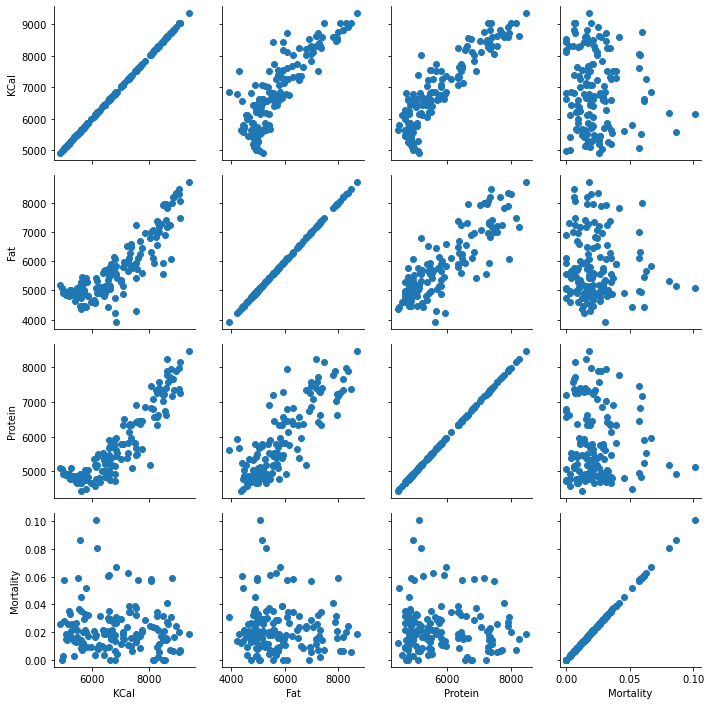

In [1055]:
# df = data['Country', '0', '1', '2','Mortality']
g = sns.PairGrid(data)
g.map(plt.scatter)

So, we are interested in the last "row" of this matrix. Nothing seems particularly linear, but we'll see what we can tell from building linear models.

**NOTE**: as the data seems very scattered, I am expecting bad values of $R^2$ score (for an interessting explanation on why this is so, I recommend reading this two well written articles: [Interpreting R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/) and [Interpreting low R-squared in regression models](https://statisticsbyjim.com/regression/low-r-squared-regression/)).

To keep track of what is important later on, let's check what features correlate the most with our target.

### [Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

First, we'll split our training data.

In [1056]:
X_train = train_data[features]
y_train = train_data[target]

Now, to build our regressor with a standardization step in our pipeline (always scale your data for Ridge regression!).

In [1057]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

## Defining the pipeline

regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge(random_state=28))
])

# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
regressor

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', Ridge(random_state=28))])

#### Training the model

In [1058]:
# Training
regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', Ridge(random_state=28))])

In [1059]:
# Scoring the training set

train_preds = regressor.predict(X_train)
regressor.score(X_train, y_train)

0.02761307230754184

#### Cross validate our score

In [1060]:
# Cross validate
cv_score = cross_val_score(regressor, X_train, y_train, cv = 10)
print(cv_score)
print(cv_score.mean())

[-0.02938712 -0.38074369  0.03508441 -0.01285176  0.0739895  -0.14457562
  0.00978867 -0.35400706 -0.4752464   0.03494401]
-0.12430050810505913


This looks very bad... Let's see some other metrics for our model.

We'll use [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error), [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) and [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) to evaluate the model.

First, let's build a simple helper function to return a dictionary with all of our scores for the chosen model.

In [1061]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create function to evaluate model on a few different scores
def show_scores(model, X_train, X_test, y_train, y_test):    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Test MAE': mean_absolute_error(y_test, test_preds),
              'Training MSE': mean_squared_error(y_train, train_preds),
              'Test MSE': mean_squared_error(y_test, test_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Test R^2': r2_score(y_test, test_preds)}
    return scores

Now, let's test the model in the test set.

In [1062]:
# Get data to test model
X_test = test_data[features]
y_test = test_data[target]

show_scores(regressor, X_train, X_test , y_train, y_test)

{'Training MAE': 0.0127365831606361,
 'Test MAE': 0.011645972980826222,
 'Training MSE': 0.0003143433343982977,
 'Test MSE': 0.00022621501630385805,
 'Training R^2': 0.02761307230754184,
 'Test R^2': -0.08584355530667698}

### Training and testing multiple models

Now that we have a general flow of testing our model, let's build a function to test different models.

We will use, besides our Ridge regressor, three other models:
* [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
*  [XGBoost Regressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

As tree base models don't require scaling as we have done for Ridge regressor, our function will have to account for scaling as a parameter. The main goal is to print out various metrics for each model.

In [1063]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# First, we create a dict with our desired models
models = {'Ridge':Ridge(random_state=28),
          'SVR':SVR(),
          'RandomForest':RandomForestRegressor(),
          'XGBoost':XGBRegressor(n_estimators = 1000, learning_rate = 0.05)}

# Now to build the function that tests each model
def model_build(model, X_train, y_train, X_test, y_test, scale=True):
    
    if scale:
        regressor = Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', model)
        ])
    
    else:
        regressor = Pipeline([
            ('estimator', model)
        ])

    # Training
    regressor.fit(X_train, y_train)

    # Scoring the training set

    train_preds = regressor.predict(X_train)
    print(f"R2 on single split: {regressor.score(X_train, y_train)}")

    # Cross validate
    cv_score = cross_val_score(regressor, X_train, y_train, cv = 10)

    print(f"Cross validate R2 score: {cv_score.mean()}")

    # Scoring the test set
    for k, v in show_scores(regressor, X_train, X_test , y_train, y_test).items():
        print("     ", k, v)

Now that we have our helper function, we loop through our `models` dictionary and score each one of them.

In [1064]:
for name, model in models.items():
    print(f"==== Scoring {name} model====")
    
    if name == 'RandomForest' or name == 'XGBoost':
        model_build(model, X_train, y_train, X_test, y_test, scale=False)
    else:
        model_build(model, X_train, y_train, X_test, y_test,)
    print()
    print(40*"=")
        

==== Scoring Ridge model====
R2 on single split: 0.02761307230754184
Cross validate R2 score: -0.12430050810505913
      Training MAE 0.0127365831606361
      Test MAE 0.011645972980826222
      Training MSE 0.0003143433343982977
      Test MSE 0.00022621501630385805
      Training R^2 0.02761307230754184
      Test R^2 -0.08584355530667698

==== Scoring SVR model====
R2 on single split: -2.2540997652402153
Cross validate R2 score: -4.194796518738435
      Training MAE 0.03021768788356765
      Test MAE 0.030708899196140314
      Training MSE 0.0010519522029134541
      Test MSE 0.0010745296406383118
      Training R^2 -2.2540997652402153
      Test R^2 -4.15779679146442

==== Scoring RandomForest model====
R2 on single split: 0.8378498289111713
Cross validate R2 score: -0.38587182353865945
      Training MAE 0.0054822515065915045
      Test MAE 0.013316193556703184
      Training MSE 5.241825450520419e-05
      Test MSE 0.0003382991771253241
      Training R^2 0.8378498289111713
     

### Hyperparameter tunning for XGBoost model

We can pick our best perfroming model and try some hyperparameter tunning with a simple [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Let's start by defining our parameters:

In [1065]:
xgb = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 1000]}

Now we can do the search (note that it can take a long time).

In [1066]:
# from sklearn.model_selection import GridSearchCV

# xgb_grid = GridSearchCV(xgb, parameters, cv = 5, n_jobs = 4, verbose = True)

# xgb_grid.fit(X_train, y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

## RAN AND GOT THE PARAMETERS USED BELLOW

In [1067]:
xgb_best = XGBRegressor(colsample_bytree = 0.7,
                        learning_rate = 0.05,
                        max_depth = 6,
                        min_child_weight = 4,
                        n_estimators = 500,
                        nthread = 4,
                        objective = 'reg:squarederror',
                        subsample = 0.7)

In [1068]:
model_build(xgb_best, X_train, y_train, X_test, y_test, scale=False)

R2 on single split: 0.9842437955101512
Cross validate R2 score: -0.92672054346963
      Training MAE 0.0016154164907529046
      Test MAE 0.01380093788841862
      Training MSE 5.093505183737897e-06
      Test MSE 0.0004106568820805494
      Training R^2 0.9842437955101512
      Test R^2 -0.9711738687167499


In [1105]:
# First, we create a dict with our desired models
models = {'Ridge':Ridge(random_state=28),
          'SVR':SVR(),
          'RandomForest':RandomForestRegressor(),
          'XGBoost':XGBRegressor(n_estimators = 1000, learning_rate = 0.05)}

In [1106]:
for name, model in models.items():
    print(f"==== Scoring {name} model====")
    
    if name == 'RandomForest' or name == 'XGBoost':
        model_build(model, X_train, y_train, X_test, y_test, scale=False)
    else:
        model_build(model, X_train, y_train, X_test, y_test,)
    print()
    print(40*"=")

==== Scoring Ridge model====
R2 on single split: 0.02761307230754184
Cross validate R2 score: -0.12430050810505913
      Training MAE 0.0127365831606361
      Test MAE 0.011645972980826222
      Training MSE 0.0003143433343982977
      Test MSE 0.00022621501630385805
      Training R^2 0.02761307230754184
      Test R^2 -0.08584355530667698

==== Scoring SVR model====
R2 on single split: -2.2540997652402153
Cross validate R2 score: -4.194796518738435
      Training MAE 0.03021768788356765
      Test MAE 0.030708899196140314
      Training MSE 0.0010519522029134541
      Test MSE 0.0010745296406383118
      Training R^2 -2.2540997652402153
      Test R^2 -4.15779679146442

==== Scoring RandomForest model====
R2 on single split: 0.8358006089338199
Cross validate R2 score: -0.46696210469432753
      Training MAE 0.0054266301591971286
      Test MAE 0.01314999230612449
      Training MSE 5.308070545168584e-05
      Test MSE 0.00033990669903519443
      Training R^2 0.8358006089338199
     

### Building best performing model

In [1107]:
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)

#### Training

In [1108]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Making predictions and visualizing

In [1109]:
test_preds = model.predict(X_test)

test_plot = X_test.copy()
test_plot['Mortality'] = y_test
test_plot['Mortality_pred'] = test_preds

test_plot

,KCal,Fat,Protein,Mortality,Mortality_pred
27,7546.195427,5935.027312,5456.127332,0.012768,0.016281
150,8117.010958,6109.029769,6785.675673,0.000000,0.037877
89,8769.123190,7986.437206,7162.956082,0.059377,0.007440
16,8830.549889,8201.068654,7352.648613,0.016426,0.007440
125,5859.262177,4822.360177,5037.696251,0.032436,0.021915
101,4967.477950,5084.516938,5064.286681,0.000000,0.025177
142,8305.372966,7313.320247,6627.416947,0.002311,0.018619
72,5564.213420,4888.258767,4818.872628,0.036319,0.033317
65,6662.127120,5755.230933,5693.896894,0.028820,0.029459
39,5104.554213,4850.748187,4894.069402,0.018875,0.016563


In [1110]:
def plotTest(col, target, data):
    fig, ax = plt.subplots(figsize=[10,8])

    sns.regplot(x = col, y = target, data = data, ax = ax, label=target)
    sns.regplot(x = col, y = target+'_pred', data = data, ax = ax, label=target+'_pred')

    plt.legend();

To visualize the resulting model, let's plot target (`Mortality`) dependecy with all features separately. In each plot, let's see both **real** data and predicted data.

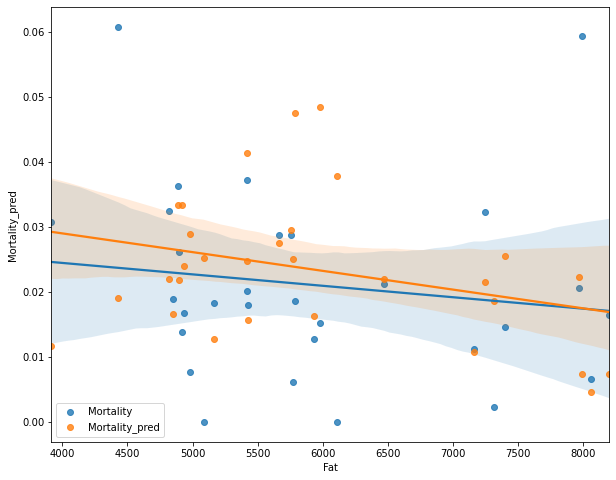

In [1111]:
plotTest('Fat', 'Mortality', test_plot)

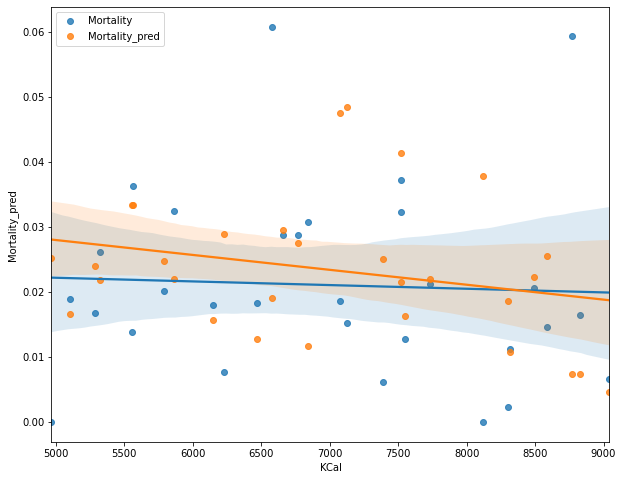

In [1112]:
plotTest('KCal', 'Mortality', test_plot)

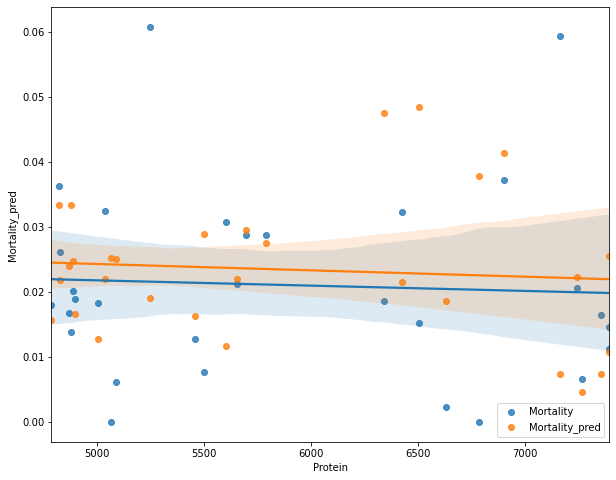

In [1113]:
plotTest('Protein', 'Mortality', test_plot)

## Clustering countries by mortality due to COVID-19

In [1089]:
X = data[features]

All centroid-based algorithms need a scaling step before modelling. And, as this is a case of unsupervised learning model, we don't need to split the data.

Let's first instantiate our scaler.

In [1090]:
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X)

StandardScaler()

In [1091]:
# Transform our data
X_scaled = scaler.transform(X)

# Sanity checks
print(X_scaled.mean(axis = 0))

print(X_scaled.std(axis=0))

[-1.11022302e-15 -3.16783636e-16 -1.56911521e-16]
[1. 1. 1.]


### K-means modeling

In [1092]:
from sklearn.cluster import KMeans

# Instantiate the model
kmeans = KMeans(n_clusters = 3)

# Fit the model
kmeans.fit(X_scaled)

# Make predictions
preds = kmeans.predict(X_scaled)

print(preds)

[2 1 2 0 1 1 1 1 2 0 1 1 1 2 0 1 2 2 1 1 0 2 2 0 2 2 1 1 2 1 0 1 2 1 1 1 0
 1 2 1 0 2 1 2 0 2 1 1 2 0 1 1 0 1 2 0 0 2 0 2 1 1 2 0 2 0 1 1 1 1 1 2 1 2
 2 2 1 0 1 2 0 0 1 1 0 0 2 1 2 1 2 2 1 1 1 2 0 2 0 1 1 2 0 0 2 1 1 1 1 2 2
 2 1 1 1 1 0 1 0 2 0 1 0 1 1 0 2 1 0 2 2 1 1 2 0 0 1 2 2 0 1 2 1 0 1 1 2 1
 0 0]


In [1093]:
# Amount of countries in each cluster

unique_countries, counts_countries = np.unique(preds, return_counts=True)
print(unique_countries)
print(counts_countries)

[0 1 2]
[37 66 47]


#### Visualizing

In [1094]:
df_vis = data.copy()
df_vis['cluster'] = [str(i) for i in preds]

df_vis.head()

,Country,KCal,Fat,Protein,Mortality,cluster
0,Afghanistan,7522.066958,5419.604222,6898.528000,0.037158,2
1,Albania,5443.876136,4650.934030,4863.214864,0.026167,1
2,Algeria,7332.662739,6301.239534,6373.076681,0.034148,2
3,Angola,8262.898702,6557.863825,6570.343202,0.031677,0
5,Argentina,5450.310065,4758.017067,4684.038805,0.026645,1


In [1095]:
fig = px.scatter(df_vis, x = 'Fat', y = 'Mortality', color = 'cluster', hover_name = 'Country')
fig.show()

In [1096]:
fig = px.scatter(df_vis, x = 'KCal', y = 'Mortality', color = 'cluster', hover_name = 'Country')
fig.show()

In [1097]:
fig = px.scatter(df_vis, x = 'Protein', y = 'Mortality', color = 'cluster', hover_name = 'Country')
fig.show()

We can find an optimal value for $k$ (number of clusters) using the "elbow" method.

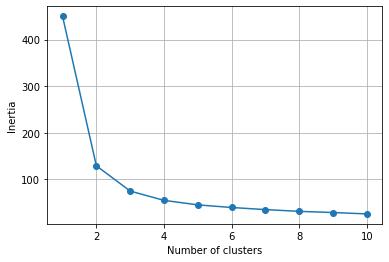

In [1099]:
# Calculate inertia for a range of clusters number
inertia = []

for i in np.arange(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Plotting
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show();

It appears $k = 3$ already is a good value for our modelling.

We can wrap this whole clustering process in a function:

In [1100]:
def cluster_preds(df, feat1, feat2, k):
    X = df[[feat1, feat2]]

    # Scaling
    scaler = StandardScaler()

    # Fit the scaler
    scaler.fit(X)

    # Transform our data
    X_scaled = scaler.transform(X)

    # Instantiate the model
    kmeans = KMeans(n_clusters = k)

    # Fit the model
    kmeans.fit(X_scaled)

    # Make predictions
    preds = kmeans.predict(X_scaled)

    # Visualizing
    df_vis = df.copy()
    df_vis['cluster'] = [str(i) for i in preds]

    fig = px.scatter(df_vis, x = feat1, y = feat2, color = 'cluster', hover_name = 'Country')
    fig.show()

Now we can quickly cluster together countries based on `Animal Products` intake and `Obesity` rate (recalling we used this features in our "simpler model to predict mortality").

In [1104]:
cluster_preds(data, 'Protein', 'Mortality', 3)